<a href="https://colab.research.google.com/github/Datanerd97/PyTorch/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Sat Apr 16 03:23:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

The 3 areas in industry where computer vision is being used... binary classification, multi-class classification and image segmentation..

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is when the model learns everything about the training set, including its noise and biases to the point. Where the model struggles to generalize well onto the test set or the validation set.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

The 3 things we can do to prevent overfitting is:


Gather more training data, Use a different machine learning algorithm, Cross-validate the data properly and or check and tweak it based on the validation set.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

The premise still stays the same:

1. Numerically encode your data
2. Feed it into a model
3. Make sure the output fits into your problem.

This is a really good website it explained everything really well.

A CNN Is a type of deep learning algorithm used to recognize patterns in data.


CNN has a variety of components such as a:
* Tensor which is a n - dimensional matrix
* A neuron which is a function that takes input and yields a single output. Where outputs of neurons are represented as activation maps
* A layer is the same collection of neurons with the same operations
* Kernel weight and biases that are tuned to each nueron during the training phase and allows the classifier to adapt to the problem and dataset provided.


* CNN utilize what is called a convolutional layer --> that makes them well-positioned to learn from image or image-like data.

--> They are mostly used for image processing,classification,segmentation and object-detection.

(These are the foundations of CNN) as they contain the learned kernels (weights) which extract features that distinguish different images from one another.

The convolutional neuron performs an elementwise dot-product with a unique kernel and the output of the previous layer's corresponding neuron.

The convolutional nueron is the result of all intermediate results summed together with learned bias.

In order to produce the output of the convolutional nueron (activation-map) we must perform an elementwise dot-product with the output of the previous layer and the unique kernel learned by the network


Some of the hyperparamters are <Padding,Stride,Kernel-Size>


There are activation functions to consider such as:

Relu - which applies non-linearity into the model which is necessary to produce non-linear boundaries such that the output cannot be written as a linear combination of the inputs

- Relu activation function is specifically used as a non-linear function because CCN used to train RELU are faster than their counter parts.


Softmax - which makes sure the CNN outputs to 1


** Pooling Layers

There are many types of pooling layers in CNN architecture **but they have the process of decreasing the spatial extent of the network, which reduces the parameters and the overall computation of the network**

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [7]:
# Setup the packages
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Setup the training set.
training_data = datasets.MNIST(
    root = "data", # Where do we download the data to
    train = True, # Do we want the training set
    download = True, # Do we want to download yes or no
    transform = ToTensor(),
    target_transform = None
)

In [8]:
# Setup testing data.
testing_data = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [9]:
# Let's take a look at the length of the training and the testing.
len(training_data),len(testing_data)

(60000, 10000)

In [18]:
class_names = training_data.classes

class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [19]:
class_to_idx = training_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

Image shape: torch.Size([1, 28, 28])


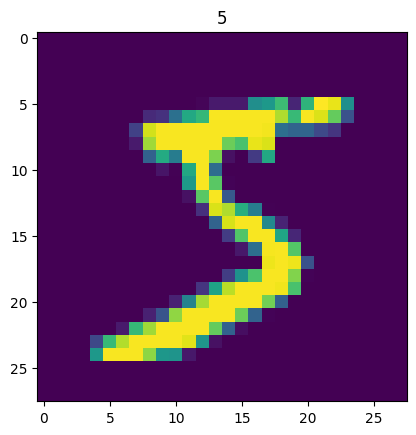

In [24]:
# Visualize atleast 5 different samples of the MNIST training dataset.

import matplotlib.pyplot as plt

image,label = training_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
plt.show()

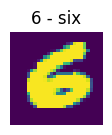

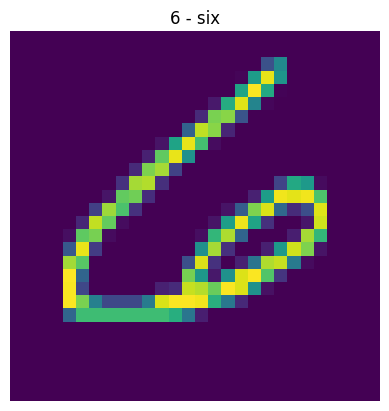

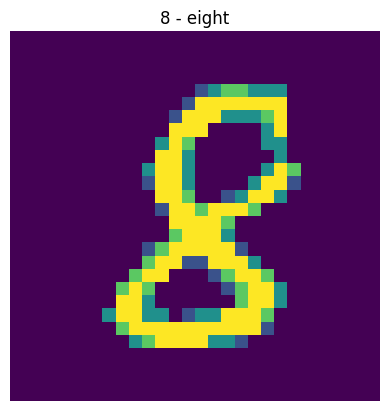

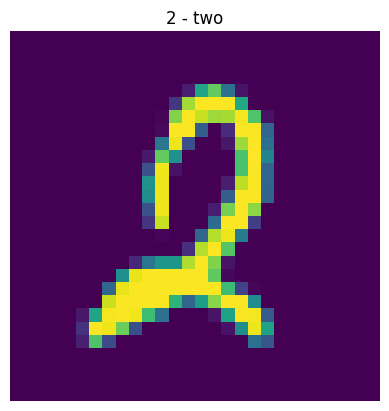

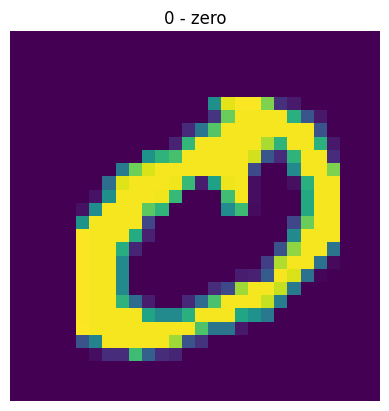

In [36]:
## Let's make a 5 by 1 grid and plot the different numbers..
torch.manual_seed(42)
fig = plt.figure(figsize = (5,7))
rows,col = 5,1

for i in range(1,rows*col+1):
  # Use this loop to grab random images, the .item returns the label
  random_idx = torch.randint(0,len(training_data),size = [1]).item()
  img,label = training_data[random_idx]
  fig.add_subplot(rows,col,i)
  plt.imshow(img.squeeze())
  plt.title(class_names[label])
  plt.axis(False)
  plt.show()


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

Right now, our dataset is in the form of Pytorch datasets, but we need to convert it into a Python iterable.

More specifically, we want to turn our data into batches or mini-batches of 32.

Why convert it into batches:
1. It is more computationally efficien, as in your computing hardware may not be able to store 60k images all at once in memory. So we train the models in batches of 32 images at a time.
A batch size of 32 is very common in Machine-Learning.

2. This gives our NN more chances to update its gradient per epochs. (If we look at 32 images at a time, our NN updates its internal states its weights.)

In [37]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn dataset into iterable. (batches)

train_dataloader = DataLoader(dataset = training_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)


test_dataloader = DataLoader(dataset = testing_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

Remember to use the shuffle argument, because we do not want the NN to remember the order of the data, but the general and individual patterns between classes.
Thus we shuffle the data.

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [40]:
from torch import nn

class MNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int,
               ):
    super().__init__()
    # Sequential allows us to go layer by layer..
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                   out_channels = hidden_units,
                   kernel_size = 3,
                   stride = 1,
                   padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
       nn.Conv2d(in_channels = hidden_units,
                 out_channels = hidden_units,
                 kernel_size = 3,
                 stride = 1,
                 padding = 1),
       nn.ReLU(),
       nn.Conv2d(in_channels = hidden_units,
                 out_channels = hidden_units,
                 kernel_size = 3,
                 stride = 1,
                 padding = 1),
       nn.ReLU(),
       nn.MaxPool2d(kernel_size = 2),
   )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7,
                  out_features = output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.conv_block_3(x)

    return x




These two layers we have created are called feature extractors, In other words they are trying to learn the patterns that best represent their data. Then this final layer is going to take those features and classify them into our target classes, whatever our model think best suits those features or whatever our model think those features that it has learned represents in terms of our classes.

In [44]:
torch.manual_seed(43)
model_2 = MNISTModelV2(input_shape = 1,
                       hidden_units = 10,
                       output_shape = len(class_names))

In [45]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),lr = 0.1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [46]:
torch.manual_seed(43)
model

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?